**Mount the Drive**

In [6]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive




*   **Import all the required modules**
*   **Specify path of the image folder in the drive**




In [7]:
import os
from google.colab.patches import cv2_imshow
import cv2 as cv
import math as m
import numpy as np
path = "My Drive/M. Tech/sem II/Computer Vision/images/"

**Functions to implement Ordered Statistics Filter**

In [11]:
def medianfilter(image, r, c):
    img = np.zeros(shape = (r,c), dtype = 'uint8')
    for x in range(1,r+1):
        for y in range(1,c+1):
            a = np.zeros(shape = (3,3))
            a = image[x-1:x+2,y-1:y+2]
            b = a.flatten()
            b = np.sort(b)
            img[x-1,y-1] = b[4]
    cv2_imshow(img)
    return img


def midpointfilter(image, r, c):
    img = np.zeros(shape = (r,c), dtype = 'uint8')
    for x in range(1,r+1):
        for y in range(1,c+1):
            a = np.zeros(shape = (3,3))
            a = image[x-1:x+2,y-1:y+2]
            b = a.flatten()
            b = np.sort(b)
            value = round((int(b[0]) + int(b[8]))/2.0)
            img[x-1,y-1] = value
    cv2_imshow(img)
    return img



def Sigma_xy(x,y,flat_x,flat_y):
  return np.mean((x-flat_x)*(y-flat_y))



def padding(image,rows,columns):
    img = np.zeros(shape = (rows+2,columns+2), dtype = 'uint8')
    img[1:rows+1,1:columns+1] = image
    return img



def SSIM(image,original,r,c,size):
  '''A function that returns SSIM score'''
  SSIM_sum = 0
  for i in range(0,r,size):
      for j in range(0,c,size):
          x = np.zeros(shape = (size,size), dtype = 'uint8')
          x = image[i:i+size+1,j:j+size+1]
          y = np.zeros(shape = (size,size), dtype = 'uint8')
          y = original[i:i+size+1,j:j+size+1]
          flat_x = x.flatten()
          flat_y = y.flatten()
          mu_x = np.mean(flat_x)
          mu_y = np.mean(flat_y)
          sigma_x = np.std(flat_x)
          sigma_y = np.std(flat_y)
          sigma_xy = Sigma_xy(flat_x,flat_y,mu_x,mu_y)
          ssim = (2*mu_x*mu_y*2*sigma_xy)/(((mu_x**2 + mu_y**2)*(sigma_x**2 + sigma_y**2)) + 0.001)
          SSIM_sum += ssim
  return SSIM_sum/256

**Main code**

Enter the image number (1,2 or 3): 1

---------------------Original Image----------------------



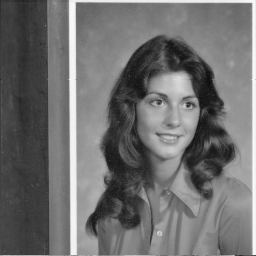


---------------------Blurred Image----------------------



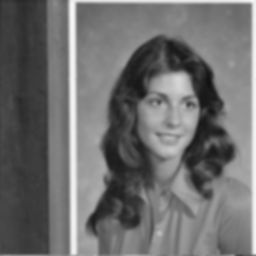

SSIM----> 0.9046703833096063

---------------------Gaussian Blurred Image----------------------



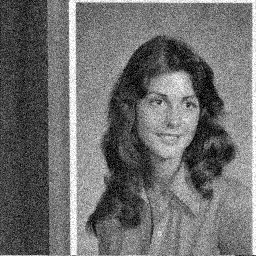

SSIM----> 0.5411717146726717

---------------------Laplacian Blurred Image----------------------



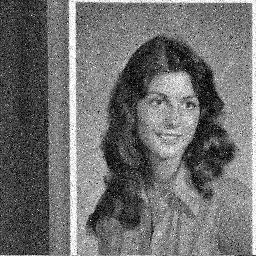

SSIM----> 0.4789391316603818

---------------------Blurred Median Filter output Image----------------------



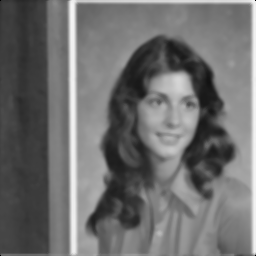

SSIM----> 0.8906298819299808

---------------------Blurred Mid Point Filter output Image----------------------



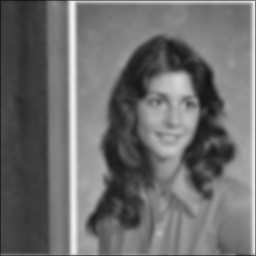

SSIM----> 0.7815561264516621

---------------------Gaussian Blurred Median Filter output Image----------------------



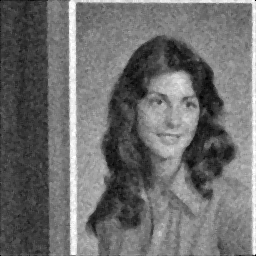

SSIM----> 0.6992819514690419

---------------------Gaussian Blurred Mid Point Filter output Image----------------------



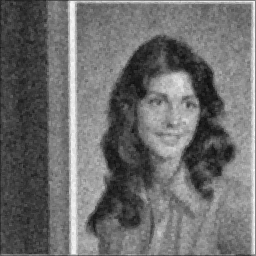

SSIM----> 0.6395322383519438

---------------------Laplacian Blurred Median Filter output Image----------------------



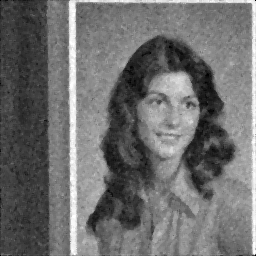

SSIM----> 0.7140362949397736

---------------------Laplacian Blurred Mid Point Filter output Image----------------------



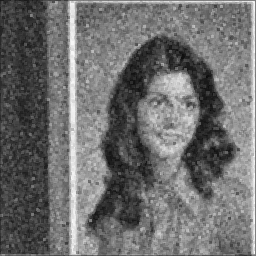

SSIM----> 0.5329059323006009


In [13]:
image_num = input("Enter the image number (1,2 or 3): ")
original = image_num + '.tiff'
blurred = image_num + 'B.bmp'
Gaussian_blurred = image_num + 'G.bmp'
Laplacian_blurred = image_num + 'L.bmp'

orig_image = cv.imread(path+original,cv.IMREAD_UNCHANGED)
print("\n---------------------Original Image----------------------\n")
rows,columns = orig_image.shape
size = int(m.sqrt((rows*columns)/256))
cv2_imshow(orig_image)


blurred_image = cv.imread(path+blurred,cv.IMREAD_UNCHANGED)
print("\n---------------------Blurred Image----------------------\n")
cv2_imshow(blurred_image)
ssim = SSIM(blurred_image,orig_image,rows,columns,size)
print("SSIM---->",ssim)


Gaussian_blurred_image = cv.imread(path+Gaussian_blurred,cv.IMREAD_UNCHANGED)
print("\n---------------------Gaussian Blurred Image----------------------\n")
cv2_imshow(Gaussian_blurred_image)
ssim = SSIM(Gaussian_blurred_image,orig_image,rows,columns,size)
print("SSIM---->",ssim)


Laplacian_blurred_image = cv.imread(path+Laplacian_blurred,cv.IMREAD_UNCHANGED)
print("\n---------------------Laplacian Blurred Image----------------------\n")
cv2_imshow(Laplacian_blurred_image)
ssim = SSIM(Laplacian_blurred_image,orig_image,rows,columns,size)
print("SSIM---->",ssim)


print("\n---------------------Blurred Median Filter output Image----------------------\n")
blurred_image = padding(blurred_image, rows, columns)
op_1B_median = medianfilter(blurred_image,rows,columns)
ssim = SSIM(op_1B_median,orig_image,rows,columns,size)
print("SSIM---->",ssim)


print("\n---------------------Blurred Mid Point Filter output Image----------------------\n")
op_1B_midpoint = midpointfilter(blurred_image,rows,columns)
ssim = SSIM(op_1B_midpoint,orig_image,rows,columns,size)
print("SSIM---->",ssim)


print("\n---------------------Gaussian Blurred Median Filter output Image----------------------\n")
Gaussian_blurred_image = padding(Gaussian_blurred_image, rows, columns)
op_1G_median = medianfilter(Gaussian_blurred_image,rows,columns)
ssim = SSIM(op_1G_median,orig_image,rows,columns,size)
print("SSIM---->",ssim)


print("\n---------------------Gaussian Blurred Mid Point Filter output Image----------------------\n")
op_1G_midpoint = midpointfilter(Gaussian_blurred_image,rows,columns)
ssim = SSIM(op_1G_midpoint,orig_image,rows,columns,size)
print("SSIM---->",ssim)


print("\n---------------------Laplacian Blurred Median Filter output Image----------------------\n")
Laplacian_blurred_image = padding(Laplacian_blurred_image, rows, columns)
op_1L_median = medianfilter(Laplacian_blurred_image,rows,columns)
ssim = SSIM(op_1L_median,orig_image,rows,columns,size)
print("SSIM---->",ssim)


print("\n---------------------Laplacian Blurred Mid Point Filter output Image----------------------\n")
op_1L_midpoint = midpointfilter(Laplacian_blurred_image,rows,columns)
ssim = SSIM(op_1L_midpoint,orig_image,rows,columns,size)
print("SSIM---->",ssim)